ANÁLISIS Y PREDICCIÓN DEL GRUPO data_T10

In [53]:
#Librería a utilizar 

import pandas as pd
import numpy as np #Librería numérica
import matplotlib.pyplot as plt
import psycopg2 #libreria para utilizar con postgres
import pandas.io.sql as psql
from sklearn.linear_model import LinearRegression

DATABASE CONNECTION:  
<ul>
<li><b>dbname</b> — the database name </li>
<li><b>user</b> — user name used to authenticate</li>
<li><b>password</b> — password used to authenticate</li>
<li><b>host</b> — database host address</li>
<li><b>port</b> — connection port number (defaults to 5432 if not provided)</li>
</ul>

In [54]:
connection = psycopg2.connect("dbname=phmkeaeu user=phmkeaeu password=D-RiqEmcoViv8Sojo5L8ExxM9ufa0mkV host = trumpet.db.elephantsql.com, port= 5432")
dt = psql.read_sql('select * from airbnb_list_complete alc ', connection)
connection.close()
dt.head(3)

d:\anaconda3\lib\site-packages\pandas\io\sql.py:762: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,index,Street,Neighbourhood Group Cleansed,City,State,Zipcode,Smart Location,Country Code,Latitude,Longitude,...,Security Deposit,Cleaning Fee,Guests Included,Extra People,Minimum Nights,Maximum Nights,Number of Reviews,Review Scores Rating,Cancellation Policy,Reviews per Month
0,0,"Madrid, Comunidad de Madrid 28005, Spain",Centro,Madrid,Comunidad de Madrid,28005,"Madrid, Spain",ES,40.407453,-3.707995,...,100.0,20.0,2,15,2,1125,30,96.0,moderate,5.11
1,1,"Madrid, Comunidad de Madrid 28012, Spain",Centro,Madrid,Comunidad de Madrid,28012,"Madrid, Spain",ES,40.408316,-3.705006,...,250.0,15.0,2,25,1,1125,97,81.0,strict,5.88
2,2,"Madrid, Comunidad de Madrid 28012, Spain",Centro,Madrid,Comunidad de Madrid,28012,"Madrid, Spain",ES,40.413722,-3.706823,...,NaN,25.0,1,0,1,1125,7,89.0,moderate,6.18


DIMENSIONES DEL DATAFRAME

In [55]:
dt.shape

(13207, 30)

ESTADÍSTICAS GENERALES DEL DATAFRAME Y VALORES DE INTERÉS

In [56]:
dt[['Price', 'Square Feet', 'Neighbourhood Group Cleansed']].describe(include = "all")

,Price,Square Feet,Neighbourhood Group Cleansed
count,13198.000000,519.000000,13207
unique,NaN,NaN,21
top,NaN,NaN,Centro
freq,NaN,NaN,6760
mean,65.924686,378.007707,NaN
std,56.008552,546.793839,NaN
min,9.000000,0.000000,NaN
25%,31.000000,0.000000,NaN
50%,52.000000,108.000000,NaN
75%,80.000000,646.000000,NaN


In [57]:
dt[['Price', 'Square Feet', 'Neighbourhood Group Cleansed']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13207 entries, 0 to 13206
Data columns (total 3 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Price                         13198 non-null  float64
 1   Square Feet                   519 non-null    float64
 2   Neighbourhood Group Cleansed  13207 non-null  object 
dtypes: float64(2), object(1)
memory usage: 309.7+ KB


FILTRADO DE DATOS

In [58]:
# Creamos un nuevo dataset con los datos filtrados por "Centro"
aux_dt = dt['Neighbourhood Group Cleansed'] == 'Centro'
new_dt = dt[aux_dt]
new_dt.shape

(6760, 30)

In [59]:
#Comporobacion de valores NaN

print(new_dt['Price'].isnull().sum())
print(new_dt['Square Feet'].isnull().sum())

3
6445


In [60]:
# Eliminar las filas que contienen el precio como NaN

fil_dt = new_dt[new_dt['Price'].notna()]
fil_dt.shape

(6757, 30)

In [61]:
# Eliminar las filas que contienen los metros cuadrados como NaN

filter_dt = fil_dt[fil_dt['Square Feet'].notna()]
filter_dt.shape

(315, 30)

In [62]:
# Creamos una nueva columna donde transformamos pies cuadrados a metros cuadrados
filter_dt['Square meter'] = filter_dt['Square Feet'] / 10.764
filter_dt[['Square meter', 'Square Feet']].head()


C:\Users\andre\AppData\Local\Temp\ipykernel_18592\2436524313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filter_dt['Square meter'] = filter_dt['Square Feet'] / 10.764


,Square meter,Square Feet
49,54.998142,592.0
199,69.955407,753.0
244,109.996284,1184.0
251,0.000000,0.0
355,79.988852,861.0


In [63]:
#Comprobación de que nos ha creado una nueva columna

filter_dt.shape

(315, 31)

In [64]:
#Creamos un array con los valores a poner en la gráfica
y = np.array(filter_dt['Price'])
x = np.array(filter_dt['Square meter'])

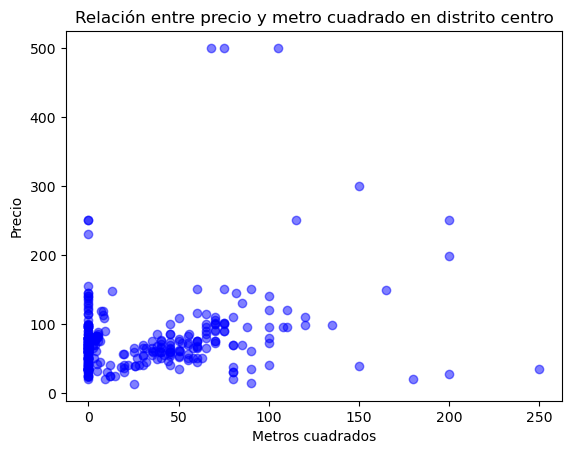

In [65]:
plt.scatter(x,y,label='data', color='blue', alpha = 0.5)
plt.title('Relación entre precio y metro cuadrado en distrito centro')
plt.ylabel('Precio')
plt.xlabel('Metros cuadrados')
plt.show()


GRÁFICA RESULTANTE DESPUÉS DEL FILTRADO DE DATOS

In [66]:
#Filtrar los valores de metros cuadrados que no sean superiores a 5

mask_dt= filter_dt['Square meter'] >= 5
filtered_dt = filter_dt[mask_dt]
filtered_dt.shape

(166, 31)

In [67]:
#Creamos un array con los valores a poner en la gráfica
y = np.array(filtered_dt['Price'])
x = np.array(filtered_dt['Square meter'])

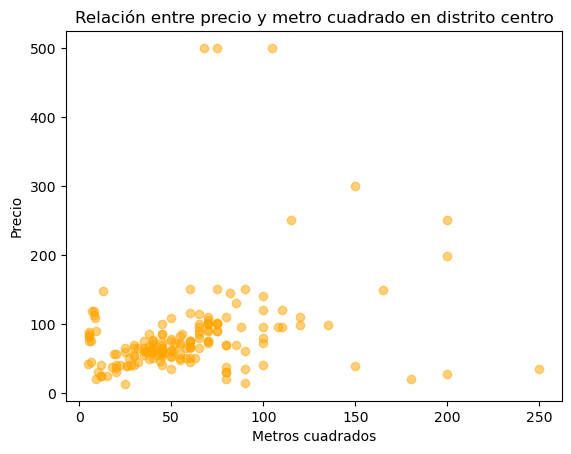

In [68]:
plt.scatter(x,y,label='data', color='orange', alpha = 0.5)
plt.title('Relación entre precio y metro cuadrado en distrito centro')
plt.ylabel('Precio')
plt.xlabel('Metros cuadrados')
plt.show()

VARIANZA Y COVARIANZA

In [69]:
print(filtered_dt.var())
covarianza=filtered_dt.cov()
covarianza.loc["Square meter" , "Price"]

index                   2.009044e+07
Latitude                3.282618e-05
Longitude               2.031153e-05
Accommodates            5.300475e+00
Bathrooms               3.560365e-01
Bedrooms                7.515712e-01
Beds                    4.310332e+00
Square Feet             1.931628e+05
Price                   4.864851e+03
Security Deposit        5.145799e+03
Cleaning Fee            3.350491e+02
Guests Included         2.800000e+00
Extra People            8.811712e+01
Minimum Nights          7.589886e+03
Maximum Nights          2.281618e+05
Number of Reviews       5.699171e+03
Review Scores Rating    7.750897e+01
Reviews per Month       2.423963e+00
Square meter            1.667156e+03
dtype: float64


C:\Users\andre\AppData\Local\Temp\ipykernel_18592\1258107741.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(filtered_dt.var())


814.8769599529163

In [70]:
print('Correlación Pearson: ', filtered_dt['Square meter'].corr(filtered_dt['Price'], method='pearson'))
print('Correlación Rho de Spearman: ', filtered_dt['Square meter'].corr(filtered_dt['Price'], method='spearman'))
print('Correlación Tau de Kendall: ', filtered_dt['Square meter'].corr(filtered_dt['Price'], method='kendall'))

Correlación Pearson:  0.28613382142783966
Correlación Rho de Spearman:  0.3579334774140575
Correlación Tau de Kendall:  0.2913853113983754


HISTOGRAMAS

Text(0.5, 0, 'Precio')

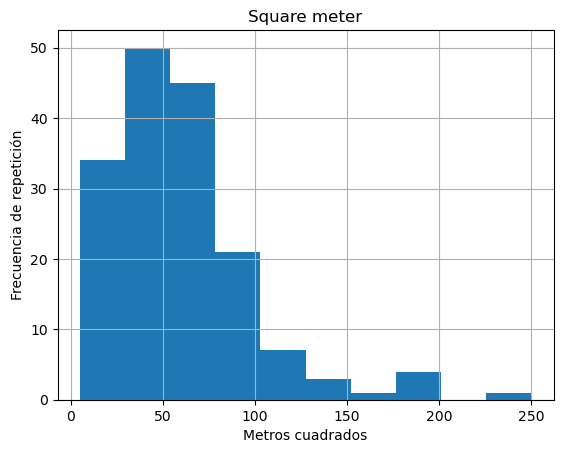

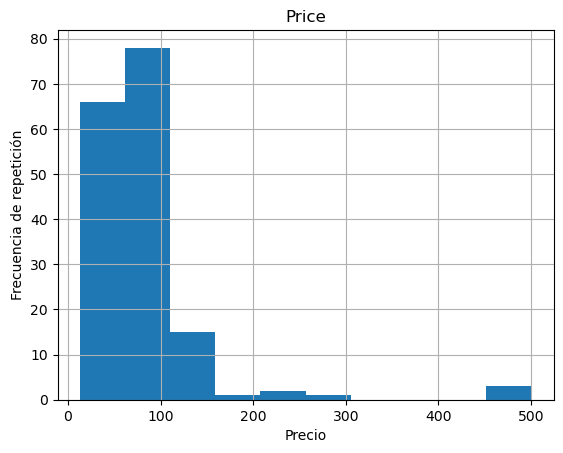

In [71]:
filtered_dt.hist('Square meter')
plt.ylabel('Frecuencia de repetición')
plt.xlabel('Metros cuadrados')
filtered_dt.hist('Price')
plt.ylabel('Frecuencia de repetición')
plt.xlabel('Precio')

REGRESION LINEAL POR MINIMOS CUADRADOS ORDINARIOS

FÓRMULA DE LA REGRESIÓN LINEAL : $ y=\beta_0+\beta_1·x $

In [72]:
#Creamos un array con los valores a poner en la gráfica
y = np.array(filtered_dt['Price'])  #Variable dependiente
x = np.array(filtered_dt['Square meter'])

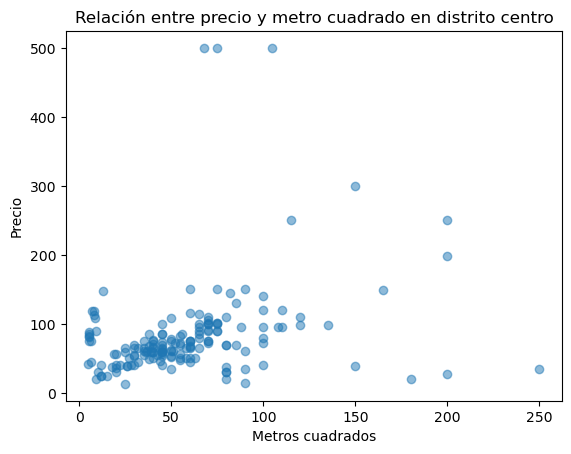

In [73]:
plt.scatter(x,y, alpha = 0.5)
plt.title('Relación entre precio y metro cuadrado en distrito centro')
plt.ylabel('Precio')
plt.xlabel('Metros cuadrados')
plt.show()

FORMULA DE MINIMIZAR EL ERROR CUADRÁTICO MEDIO (MCO) : $\beta = (X^{T}X)^{-1}X^{T}Y$

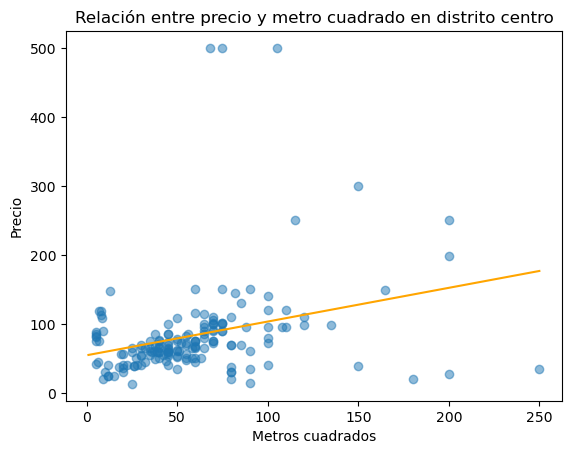

In [74]:
# Añadir columnas de unos para término independiente
plt.scatter(x,y, alpha = 0.5)
plt.title('Relación entre precio y metro cuadrado en distrito centro')
plt.xlabel('Metros cuadrados')
plt.ylabel('Precio')

x = np.array([np.ones(x.size), x]).T # Debe cuadrar con el tamaño de x

B = np.linalg.inv(x.T @ x) @ x.T @ y 

plt.plot([1, 250],[B[0]+ B[1] * 1, B[0] + B[1] * 250], c = "orange")
plt.show()

In [75]:
filtered_dt[['Price', 'Square meter']].describe(include = "all")

,Price,Square meter
count,166.000000,166.000000
mean,83.240964,58.752849
std,69.748482,40.830819
min,13.000000,5.016722
25%,50.500000,35.024155
50%,70.000000,51.514307
75%,95.000000,74.972129
max,500.000000,250.000000


In [76]:
modelo = LinearRegression()
modelo.fit(x, y)
print("Intercept:", modelo.intercept_)
print("Coeficiente de determinación R^2:", modelo.score(x, y))

Intercept: 54.52358523946688
Coeficiente de determinación R^2: 0.08187256376489904
